In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')
import sys
sys.path.append('/content/gdrive/My Drive/import')
%load_ext autoreload
%autoreload 2
import edhec_risk_kit_106 as erk
import pandas as pd
import numpy as np
import scipy.stats
%reload_ext autoreload

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
4/3wFfJoPGpUZojubP7KCon2ij6sTI0tlHwOgbDygE89E2sP3nk9wX4k4
Mounted at /content/gdrive/


In [3]:
data = pd.read_csv("data/Portfolios_Formed_on_ME_monthly_EW.csv",
                   header=0,
                   index_col=0,
                   na_values=-99.99,
                   parse_dates=True,
                  )

In [4]:
data = data[["Lo 20", "Hi 20"]]

In [5]:
data = data/100

In [6]:
data.index = pd.to_datetime(data.index, format="%Y%m").to_period("M")

In [7]:
data.describe()

,Lo 20,Hi 20
count,1110.000000,1110.000000
mean,0.015904,0.009434
std,0.097197,0.056325
min,-0.309900,-0.304000
25%,-0.026950,-0.019175
50%,0.011900,0.012300
75%,0.048300,0.038375
max,1.126000,0.416300


In [8]:
n_months = data.shape[0]
return_per_month = (data + 1).prod() ** (1 / n_months) - 1
print(return_per_month*100)

Lo 20    1.185974
Hi 20    0.785878
dtype: float64


In [9]:
annualized_return = (return_per_month + 1)**12 - 1
annualized_return*100

Lo 20    15.197701
Hi 20     9.849021
dtype: float64

In [10]:
annualized_volatility = data.std()*np.sqrt(12)

In [11]:
annualized_volatility

Lo 20    0.336701
Hi 20    0.195116
dtype: float64

In [12]:
def annualized_return(r, periods_per_year):
    """
    Computes annualized return on a time series of asset returns
    """
    compounded_growth = (r + 1).prod()
    n_periods = r.shape[0]
    return compounded_growth ** (periods_per_year / n_periods) - 1 
annualized_return(data["1999":"2015"],12)*100

Lo 20    11.442634
Hi 20     6.286512
dtype: float64

In [13]:
def annualized_volatility(r, periods_per_year):
    """
    Computes annualized volatility on a time series of asset returns
    """
    return r.std()*np.sqrt(periods_per_year)
annualized_volatility(data["1999":"2015"],12)*100

Lo 20    22.889447
Hi 20    17.271332
dtype: float64

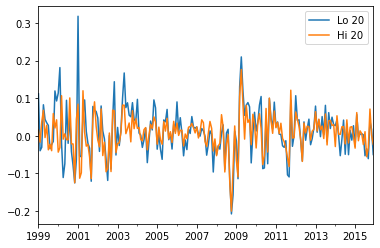

In [14]:
data["1999":"2015"].plot()

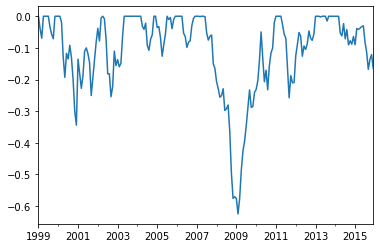

In [15]:
erk.drawdown(data["Lo 20"]["1999":"2015"])["Drawdown"].plot()

In [16]:
erk.drawdown(data["Lo 20"]["1999":"2015"])["Drawdown"].min()*100

-62.48092431236988

In [17]:
erk.drawdown(data["Lo 20"]["1999":"2015"])["Drawdown"].idxmin()

Period('2009-02', 'M')

In [18]:
erk.drawdown(data["Hi 20"]["1999":"2015"])["Drawdown"].min()*100

-55.27349978713653

In [19]:
erk.drawdown(data["Hi 20"]["1999":"2015"])["Drawdown"].idxmin()

Period('2009-02', 'M')

In [21]:
hfi = erk.get_hfi_returns()

In [22]:
hfi.describe()

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
count,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000
mean,0.005508,0.004074,0.006946,0.006253,0.004498,0.006344,0.004365,0.005403,0.006331,0.005356,0.005792,-0.001701,0.004262
std,0.016567,0.023335,0.017042,0.032538,0.008130,0.016744,0.011539,0.014722,0.019935,0.009619,0.011484,0.047746,0.015566
min,-0.123700,-0.056800,-0.083600,-0.192200,-0.058700,-0.088600,-0.086700,-0.031300,-0.067500,-0.054400,-0.069200,-0.134000,-0.061800
25%,-0.000150,-0.012050,-0.001450,-0.009750,0.001500,-0.001450,0.001650,-0.004050,-0.004750,0.000600,0.001000,-0.027100,-0.003500
50%,0.006500,0.001400,0.008900,0.009600,0.005100,0.008400,0.005500,0.003800,0.007900,0.006000,0.006700,-0.005300,0.005200
75%,0.013600,0.019850,0.017750,0.025700,0.008300,0.016200,0.009550,0.012400,0.019150,0.011100,0.012950,0.019850,0.012100
max,0.061100,0.069100,0.050400,0.123000,0.025300,0.044200,0.036500,0.073800,0.074500,0.027200,0.039200,0.246300,0.066600


In [26]:
erk.semideviation(hfi["2009":"2018"]).sort_values()

Fixed Income Arbitrage    0.003321
Merger Arbitrage          0.003611
Global Macro              0.005075
Equity Market Neutral     0.005186
Relative Value            0.005711
Convertible Arbitrage     0.006681
Funds Of Funds            0.007948
Distressed Securities     0.009498
Event Driven              0.010135
CTA Global                0.010996
Long/Short Equity         0.012139
Emerging Markets          0.015276
Short Selling             0.021240
dtype: float64

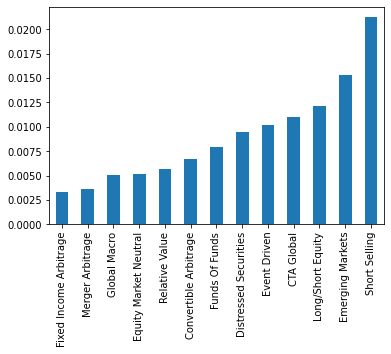

In [23]:
erk.semideviation(hfi["2009":"2018"]).sort_values().plot.bar()

In [27]:
erk.skewness(hfi["2009":]).sort_values()

Equity Market Neutral    -0.896327
Funds Of Funds           -0.646908
Merger Arbitrage         -0.551065
Event Driven             -0.488821
Long/Short Equity        -0.463703
Distressed Securities    -0.254944
Emerging Markets          0.033123
CTA Global                0.052062
Relative Value            0.159953
Global Macro              0.348184
Short Selling             0.456518
Fixed Income Arbitrage    1.121453
Convertible Arbitrage     1.305911
dtype: float64

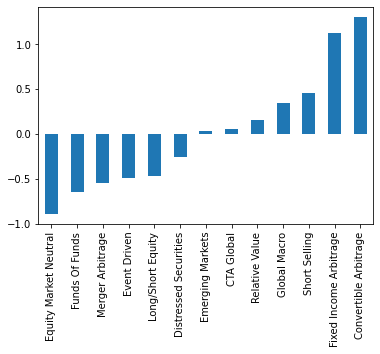

In [24]:
erk.skewness(hfi["2009":]).sort_values().plot.bar()

In [28]:
erk.kurtosis(hfi["2000":"2018"]).sort_values()

CTA Global                 2.845022
Global Macro               3.653278
Short Selling              4.352758
Long/Short Equity          4.472589
Merger Arbitrage           4.520785
Event Driven               5.543444
Emerging Markets           5.941289
Distressed Securities      6.231720
Funds Of Funds             7.584725
Relative Value            12.731096
Equity Market Neutral     20.329621
Convertible Arbitrage     23.001449
Fixed Income Arbitrage    33.378729
dtype: float64

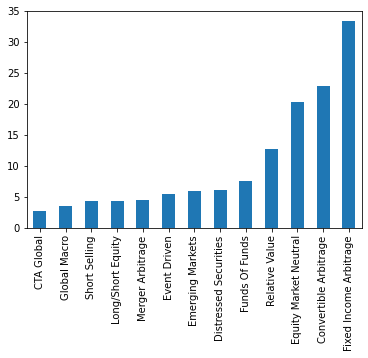

In [25]:
erk.kurtosis(hfi["2000":"2018"]).sort_values().plot.bar()

In [29]:
!jupyter nbconvert Week_1_Quiz.ipynb

[NbConvertApp] Converting notebook Week_1_Quiz.ipynb to html
[NbConvertApp] Writing 442381 bytes to Week_1_Quiz.html
